Google Data Studio presentation https://datastudio.google.com/u/0/reporting/ccd3f733-da33-44db-8336-2ccc83e49974/page/Zp4hC

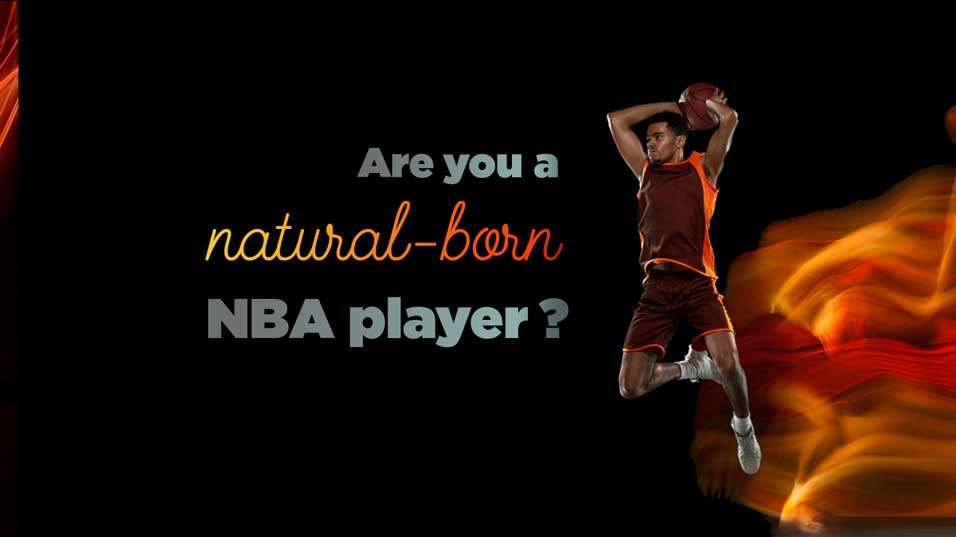

---

# Overview

The National Basketball Association **(NBA)** is a professional basketball league in North America since 1946. The league is composed of 30 teams and is one of the four major professional sports leagues in the United States.

The NBA's regular season runs from October to April, with each team playing 82 games. As of 2020, NBA players are the world's best paid athletes by average annual salary per player.

The dataset consists of 2 tables about NBA players and their stats in games throughout seasons since 1950.

The dataset focuses individually on evey player by two tables:

Table `'Players'` (**4549** players): provides basic background information on name, birth date, NBA career length and some physical attributes such as height and weight.

Table `'Seasons'` (**3291** players) : lists personal advanced stats for each NBA season since 1950. We can have access to data ranging from `'positions'` to efficiency metrics (such as: `field goal, rebounds, assist, steal, block, point, true shooting, win share`, etc.)

# 1. Import libraries and load dataset

In [ ]:
#@title
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np
import re 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!wget https://github.com/mapzen/open/raw/master/assets/fonts/Gotham-Bold.ttf
fm.fontManager.ttflist += fm.createFontList(['Gotham-Bold.ttf'])
matplotlib.rc('font', family='Gotham-Bold')

soil = '#B76226'
basketball = '#F68D2F'
beige = '#F8E9D5'
mint = '#A0D1C9'
earth_ =  '#11956B'
fire_ = '#ff7e0e'
water_ = '#1f76b4'
air_ = '#951191'

Mounted at /content/gdrive
--2022-01-13 03:03:43--  https://github.com/mapzen/open/raw/master/assets/fonts/Gotham-Bold.ttf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mapzen/open/master/assets/fonts/Gotham-Bold.ttf [following]
--2022-01-13 03:03:44--  https://raw.githubusercontent.com/mapzen/open/master/assets/fonts/Gotham-Bold.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45744 (45K) [application/octet-stream]
Saving to: ‘Gotham-Bold.ttf’

Gotham-Bold.ttf     100%[===================>]  44.67K  --.-KB/s    in 0.01s   

2022-01-13 03:03:44 (4.34 MB/s) - ‘Gotham-Bold.ttf’ saved [45744/4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  


In [ ]:
players = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/WE 5-6-7-8/players.csv')
seasons = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/WE 5-6-7-8/seasons.csv')

## 1.1 Understand `Players` table

Check out Players table and think of what we can get from it.

*  `name` : full name of NBA player.
*   `year_start` : the first year they played in NBA league.
*   `year_end` : the last year they played in NBA league.
*   `position` : role in a team (There are 3 main postions: **Forward** (tiền phong), **Guard** (hậu vệ) và **Center** (trung phong). Some players rotate between 2 roles.
*   `height` : height in feet and inches (need to convert to centimeters for Vietnamese audience).
*   `weight` : weight in lbs (need to convert to kilograms for Vietnamese audience).
*   `birth_date` : date of birth (in "Month abbreviation, Day without leading zeros, Year" format) 
*   `college` : the univeristy that they played for.

In [ ]:
#@title View the first 5 rows
players.head(5)

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


Well, should we just do some statistical calculations to find out the central tendency and dispersion of their height, weight, career length distribution? Or to list out the tallest and lightest ones, which everybody seemed to have done it already?

And then ...

> 🖐 Seeing the `birth_date` column made me think of a kinda outrageous idea, which is 

> - **classifying NBA players based on their astrological signs and elements** ⭐ and 

> - comparing these groups to find out if there is any outstanding physical attribute and performance among them 🏀.

##1.2 Understand `Seasons` table

This table gives us a more in-depth look into each player season by season. We have about 53 columns and most of them are numerical stats in games. It would be better if we group them into main categories, such as:


*   Group 1 - Games played

      `G`: number of game played, `GS` : number of game in starting lineup, `MP` : minutes played, `Pos` : position(s) in game(s)

*   Group 2 - Point achievements
      
      `PTS` : points, `TS%` : true shooting percentage

      `FG` : field goal (bàn thắng không phải do ném phạt), `FGA`, `FG%`, `eFG%`

      `3P` : 3-point field goal (bàn thắng 3 điểm), `3PA`, `3P%`, `3PAr`

      `2P` : 2-point field goal (bàn thắng 2 điểm), `2PA`, `2P%`

      `FT` : free throw (ném phạt 1 điểm), `FTA`, `FT%`, `FTr`

*   Group 3 - Offensive and Defensive stats

      `TRB` : total rebound (bắt được quả bóng sau một cú ném hỏng), `TRB%` 
      
      (`ORB` : offensive rebound (đội tấn công bắt được), `ORB%`

      `DRB` : defensive rebound (đội phòng thủ bắt được), `DRB%`)

      `BPM` : box plus/minus (ước tính số điểm đóng góp vào thành tích của cả đội cứ mỗi 100 lần có bóng) (giá trị TB league average = 0)

    (`OBPM` : offensive BPM (BPM nhờ kỹ năng tấn công)

    `DBPM` : defensive BPM (BPM nhờ kỹ năng phòng thủ) )

 `WS` : win share (số phần chiến thắng đóng góp vào thành tích thắng của đội)

    (`WS/48` : win share per 48 minutes (win share mỗi 48 phút)

    `OWS` : offensive win share (win share có được nhờ kỹ năng tấn công
    
    `DWS`: defensive win share (win share có được nhờ kỹ năng phòng thủ) )

*   Group 4 - Efficiency stats

    `USG%` : usage rate (tỉ lệ tham gia vào trận đấu khi trên sân)

    `PER` : player efficiency rating (hiệu suất thi đấu mỗi phút)

    `VORP` : value over replacement player (ước tính giá trị đóng góp vào thành tích cả đội so với cầu thủ dự bị (giải NBA đánh giá value của cầu thủ dự bị là)

* Group 5 - Others stats

    `BLK` : block (cản phá pha ghi bàn), `BLK%`

    `AST` : assisst (chuyền bóng gần nhất dẫn đến bàn thắng), `AST%`

    `STL` : steal (cướp bóng hợp lệ), `STL%`

    `TOV` : turnover (mất quyền kiểm soát bóng ngay trước khi ghi bàn), `TOV%`

    `PF` : personal foul (phạm lỗi cá nhân)






For detailed definitions of these stats, please check this glossary: https://www.basketball-reference.com/about/glossary.html#fga


In [ ]:
#@title View the first 5 rows
seasons.head(5)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


## 1.3 Big questions:

Is there any natural-born astrological element (Fire, Earth, Air, Water) for basketball players?

According to a research on ["Astrological Stereotypes in China"](https://gosling.psy.utexas.edu/wp-content/uploads/2020/03/Lu-et-al.-2020-Disentangling-stereotypes-from-social-reality-Astrological-stereotypes-and-discrimination-in-China-JPSP.pdf), I've gathered some adjectives that are "labeled" for every zodiac sign. Since each element consists of 3 zodiac signs, I'll use these 3-adjective groups as a support for my hypothesis.

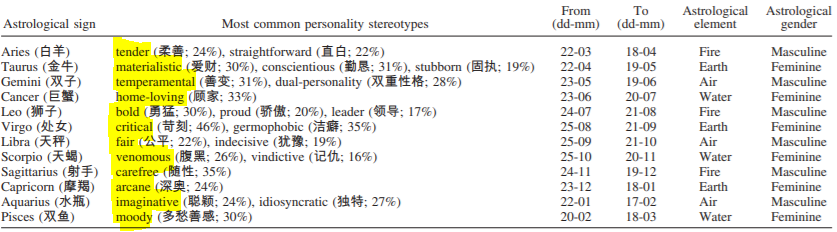



- Hypothesis 1: Fire and Earth players seem to be faster, stronger and decisive (**bold & critical** in the table above) which is more suitable for energetic sport like basketball.
- Hypothesis 2: Air and Water players are more likely to act from natural impulse or harmonious (**temperamental, moody & fair** in the table above) which might lead to lower performance in sports like basketball.

### 🤡 1st challenge: Scientific background on Astrology?
 Some thoughtful notes on the scientific side of doing analysis on so-called "pseudoscience" astrology:

*(adapted from [Alexander Boxer](https://towardsdatascience.com/are-there-really-more-capricorns-in-the-national-hockey-league-6edbf4401ea0) - Author of A scheme of heaven: The History of Astrology and the Search for Our Destiny in Data)*

*   Unluckily, I couldn't find any research on the correlation between performance in sports and astrological sign. However, what we are doing is **data analysis** and that's why "It doesn’t matter what you think the answer is; all that matters is whether you can back up your position with data and statistics."
*   Besides, I have no intention of making any causal fallacy here. And putting astrological sign here helps "set aside your personal biases when examining a topic". What we can observe from this dataset might inform us a pattern, not an explanation or conclusion.
*   Let's get our hands dirty and find something!

# 2. Clean data

## 2.1 Clean `Players` table

In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4550 non-null   object 
 1   year_start  4550 non-null   int64  
 2   year_end    4550 non-null   int64  
 3   position    4549 non-null   object 
 4   height      4549 non-null   object 
 5   weight      4544 non-null   float64
 6   birth_date  4519 non-null   object 
 7   college     4248 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


In [ ]:
#@title Drop unwanted and null data
# Drop unwanted columns
players.drop(columns='college', inplace=True)
# Drop rows with null values
players.dropna(subset=['birth_date', 'height', 'weight'], inplace=True)

In [ ]:
#@title Convert height and weight from "foot" and "pound" to "centimeter" and "kilogram"
def get_feet(height):
    return re.search('\d+(?=-)', height).group()
def get_inches(height):
    return re.search('(?<=-)\d{1,2}', height).group()

players['height(feet)']=players['height'].apply(get_feet)
players['height(inches)']=players['height'].apply(get_inches)

players = players.astype({"height(feet)": int, "height(inches)": int})

players['height(cm)'] = (players['height(feet)'] * 30.48).round(decimals = 2) + (players['height(inches)'] * 2.54).round(decimals = 2)
players['weight(kg)'] = (players['weight'] * 0.45359237).round(decimals = 2)

In [ ]:
#@title Extract the Day and Month column
players['birth_date'] = pd.to_datetime(players['birth_date'])
players['birth_day'] = players['birth_date'].dt.day
players['birth_month'] = players['birth_date'].dt.month

# Drop redundant columns after converting
players.drop(columns=['birth_date', 'height', 'weight', 'height(feet)', 'height(inches)'], inplace=True)

In [ ]:
#@title Classify players' birth day and month to astrological signs and elements
def zodiac_sign(players): 
    if players['birth_month'] == 12: 
        return 'Sagittarius' if (players['birth_day'] < 22) else 'Capricorn'

    elif players['birth_month'] == 1: 
        return 'Capricorn' if (players['birth_day'] < 20) else 'Aquarius'

    elif players['birth_month'] == 2: 
        return 'Aquarius' if (players['birth_day'] < 19) else 'Pisces'

    elif players['birth_month'] == 3: 
        return 'Pisces' if (players['birth_day'] < 21) else 'Aries'

    elif players['birth_month'] == 4: 
        return 'Aries' if (players['birth_day'] < 20) else 'Taurus'

    elif players['birth_month'] == 5: 
        return 'Taurus' if (players['birth_day'] < 21) else 'Gemini'

    elif players['birth_month'] == 6: 
        return 'Gemini' if (players['birth_day'] < 21) else 'Cancer'

    elif players['birth_month'] == 7: 
        return 'Cancer' if (players['birth_day'] < 23) else 'Leo'

    elif players['birth_month'] == 8: 
        return 'Leo' if (players['birth_day'] < 23) else 'Virgo'

    elif players['birth_month'] == 9: 
        return 'Virgo' if (players['birth_day'] < 23) else 'Libra'

    elif players['birth_month'] == 10: 
        return 'Libra' if (players['birth_day'] < 23) else 'Scorpio'

    elif players['birth_month'] == 11: 
        return 'Scorpio' if (players['birth_day'] < 22) else 'Sagittarius'

players['zodiac_sign'] = players.apply(zodiac_sign, axis = 1)

def elements(players):
    if players['zodiac_sign'] in ('Cancer', 'Scorpio', 'Pisces'):
        return 'Water'
    elif players['zodiac_sign'] in ('Capricorn', 'Taurus', 'Virgo'):
        return 'Earth'
    elif players['zodiac_sign'] in ('Aries', 'Sagittarius', 'Leo'):
        return 'Fire'
    elif players['zodiac_sign'] in ('Aquarius', 'Gemini', 'Libra'):
        return 'Air'

players['element'] = players.apply(elements, axis = 1)

In [ ]:
#@title Check the Positions 
players['position'].value_counts()

G      1565
F      1274
C       497
F-C     388
G-F     359
C-F     218
F-G     213
Name: position, dtype: int64

### 🤡 2nd challenge: A player with two positions? The difference between F-C and C-F?

In terms of players' positions, there are something ambiguous here:

1. Some players take **two roles**, which makes it more difficult to categorize them the basic ones.

2. There are 388 players' in position `F-C` while there are 218 players in position `C-F`. The same reversed pattern also appears in `G-F` (359) and `F-G` (213).

Since these data take up a considerable percentage in our dataset, it couldn't be dropped easily...

Seeing such these confusing things makes me want to double check the data in this dataset by searching for their "actual" positions on another database. And, there is nothing wrong here, they did take two roles in that season. Which comes first is the position they took more frequently.

In [ ]:
#@title Group into basic positions
def refined_position(players):
    if players['position'] in ('F-C', 'F-G', 'F'):
        return 'F'
    elif players['position'] in ('G-F', 'G'):
        return 'G'
    elif players['position'] in ('C-F', 'C'):
        return 'C'

players['position'] = players.apply(refined_position, axis=1)

In [ ]:
#@title Calculate the length of their career in NBA 
players['nba_career'] = players['year_end'] - players['year_start'] + 1

# Since the dataset only collects until 2018, we had better not take the players with `year_end` in 2018 into account 
# when getting the distribution of their nba length
nba_length = players[players.year_end != 2018] 

In [ ]:
# After cleaning
players.head()

,name,year_start,year_end,position,height(cm),weight(kg),birth_day,birth_month,zodiac_sign,element,nba_career
0,Alaa Abdelnaby,1991,1995,F,208.28,108.86,24,6,Cancer,Water,5
1,Zaid Abdul-Aziz,1969,1978,C,205.74,106.59,7,4,Aries,Fire,10
2,Kareem Abdul-Jabbar,1970,1989,C,218.44,102.06,16,4,Aries,Fire,20
3,Mahmoud Abdul-Rauf,1991,2001,G,185.42,73.48,9,3,Pisces,Water,11
4,Tariq Abdul-Wahad,1998,2003,F,198.12,101.15,3,11,Scorpio,Water,6


## 2.2 Clean `Seasons` table

In [ ]:
seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

In [ ]:
# Convert year to integer:
seasons['Year'] = seasons['Year'].astype('Int64')

In [ ]:
# Drop stats don't belong to any player
seasons.dropna(subset=['Player'], inplace=True) 

In [ ]:
# Let's look into columns of stats
seasons.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [ ]:
# Drop ambiguous columns
seasons.drop(columns=['Unnamed: 0','blanl','blank2'],inplace=True)

In [ ]:
# Grouping positions
seasons.Pos.value_counts()

PF       4966
SG       4811
C        4759
SF       4699
PG       4648
G         139
F         123
F-C        81
G-F        79
F-G        60
C-F        35
C-PF       33
SF-SG      30
PG-SG      28
PF-C       27
SG-PG      27
SG-SF      26
PF-SF      25
SF-PF      21
SG-PF       3
C-SF        2
PG-SF       1
SF-PG       1
Name: Pos, dtype: int64

Same issue as in `Players` table

In [ ]:
#@title Group into basic positions
def refined_positions(seasons):
    if seasons['Pos'] in ('PF','PF-C','PF-SF'):
        return 'PF'
    elif seasons['Pos'] in ('C','C-PF','C-SF'):
        return 'C'
    elif seasons['Pos'] in ('PG','PG-SG','PG-SF'):
        return 'PG'
    elif seasons['Pos'] in ('SF','SF-SG','SF-PF'):
        return 'SF'
    elif seasons['Pos'] in ('SG','SG-PG','SG-SF','SG-PF'):
        return 'SG'
seasons['Pos2'] = seasons.apply(refined_positions, axis=1)

In [ ]:
#@title Select the period to work with and check for null values
ss8017 = seasons[(seasons.Year >= 1980) & (seasons.Year <=2017)]
ss8017[ss8017.columns].isna().sum()

Year         0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS         694
MP           0
PER          5
TS%         76
3PAr        88
FTr         88
ORB%         5
DRB%         5
TRB%         5
AST%         5
STL%         5
BLK%         5
TOV%        61
USG%         5
OWS          0
DWS          0
WS           0
WS/48        5
OBPM         0
DBPM         0
BPM          0
VORP         0
FG           0
FGA          0
FG%         88
3P           0
3PA          0
3P%       3511
2P           0
2PA          0
2P%        117
eFG%        88
FT           0
FTA          0
FT%        745
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
Pos2         0
dtype: int64

### 🤡 3rd challenge: Too much null values? Fill with which value?

Let's look at some columns with null values and their calculation formulae:

`TS%`  =  `PTS` / ((2 * `FGA`) + (0.88 * `FTA`))

`TOV%`  =  (`TOV` / (`FGA` + (0.44 * `FTA`) + `TOV`)) * 100

`WS/48` = 48 * (`WS`/`MP`)

`eFG%` = (`FG` + (0.5 + `3P`)) /`FGA`

`FG%` = `FG` / `FGA` , etc.

Most of them are division calculations, which will be invalid if divisor equals 0. For example, to calculate win share per 48 minutes of player at index 17787 Josh Davis in 2006, we need his `win share` and `minutes played`. However, both metrics are zero. This leads to a NaN in `WS/48` column.

So, just let them there ...

In [ ]:
# Nan values due to 0-value divisor
ss8017[ss8017['WS/48'].isna()][['Player','Year','WS','MP','WS/48']]

,Player,Year,WS,MP,WS/48
17787,Josh Davis,2006,0.0,0.0,NaN
18104,Alex Scales,2006,0.0,0.0,NaN
19069,Stephane Lasme,2008,0.0,0.0,NaN
20041,JamesOn Curry,2010,0.0,0.0,NaN
21932,Damion James,2013,0.0,0.0,NaN


In [ ]:
# After cleaning and masking
ss8017.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Pos2
5727,1980,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.0,2.7,6.7,6.8,835.0,1383.0,0.604,0.0,1.0,0.000,835.0,1382.0,0.604,0.604,364.0,476.0,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0,C
5728,1980,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,0.511,0.003,0.258,5.4,12.0,8.6,9.3,1.4,0.6,9.9,13.3,1.2,0.8,2.0,0.080,-1.5,-0.1,-1.6,0.1,153.0,318.0,0.481,0.0,1.0,0.000,153.0,317.0,0.483,0.481,56.0,82.0,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0,PF
5729,1980,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,0.571,0.002,0.270,8.2,22.4,15.4,21.6,2.3,1.4,18.2,21.9,3.1,3.9,7.0,0.155,1.6,2.8,4.4,3.5,465.0,875.0,0.531,0.0,2.0,0.000,465.0,873.0,0.533,0.531,188.0,236.0,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0,C
5730,1980,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,0.023,0.548,2.3,5.3,3.8,30.2,1.7,0.2,19.7,17.0,5.9,2.9,8.9,0.148,1.1,-1.1,0.0,1.5,383.0,794.0,0.482,4.0,18.0,0.222,379.0,776.0,0.488,0.485,361.0,435.0,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0,PG
5731,1980,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,0.524,0.000,0.833,6.0,16.9,11.5,9.0,1.0,1.5,24.8,7.9,0.1,0.5,0.6,0.053,-2.9,1.5,-1.4,0.1,27.0,60.0,0.450,0.0,0.0,NaN,27.0,60.0,0.450,0.450,32.0,50.0,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0,C


# 3. Findings on dividual players

## 3.1 Distribution on Physical attributes and NBA career

*   Physical attributes includes: height and weight
*   NBA career includes: year start playing NBA league and career length




In [ ]:
#@title Define kde plotting functions
def kde(df,title,xvar,hue):
    plt.style.use(['classic','Solarize_Light2'])
    palette = {"Air": air_, "Fire": fire_, "Earth": earth_, "Water": water_}
    plt.title(title, y=1.02, pad = 2, fontsize=15, fontweight='bold', color=soil, fontfamily = 'gotham')
    sns.kdeplot(data = df, x = xvar, hue = hue, palette = palette)
    plt.legend([],[], frameon=False)

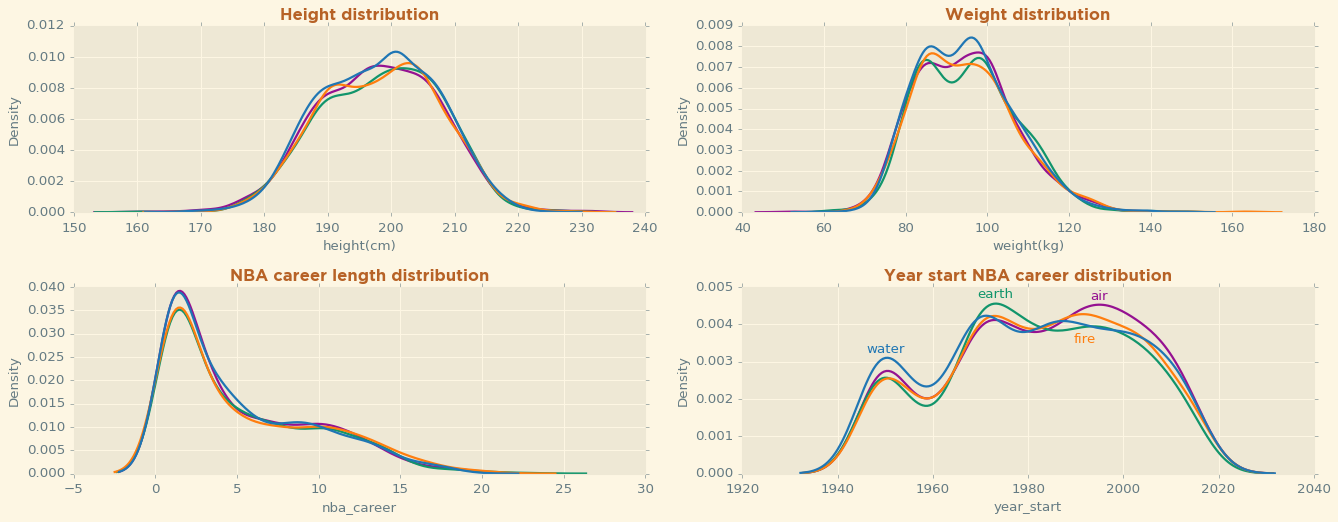

In [ ]:
#@title Plotting distributions
plt.figure(figsize=(20,7))
plt.subplots_adjust(wspace=0.17, hspace=0.4)
plt.subplot(2,2,1)
kde(players,"Height distribution", "height(cm)","element")
plt.subplot(2,2,2)
kde(players,"Weight distribution", "weight(kg)", "element")
plt.subplot(2,2,3)
kde(nba_length,"NBA career length distribution", "nba_career","element")
plt.subplot(2,2,4)
kde(nba_length,"Year start NBA career distribution", "year_start","element")
plt.text (1950, 0.00325, 'water', ha = 'center', color = water_)
plt.text (1973, 0.0047, 'earth', ha = 'center', color = earth_)
plt.text (1995, 0.00467, 'air', ha = 'center', color = air_)
plt.text (1992, 0.0035, 'fire', ha = 'center', color = fire_)
plt.show()

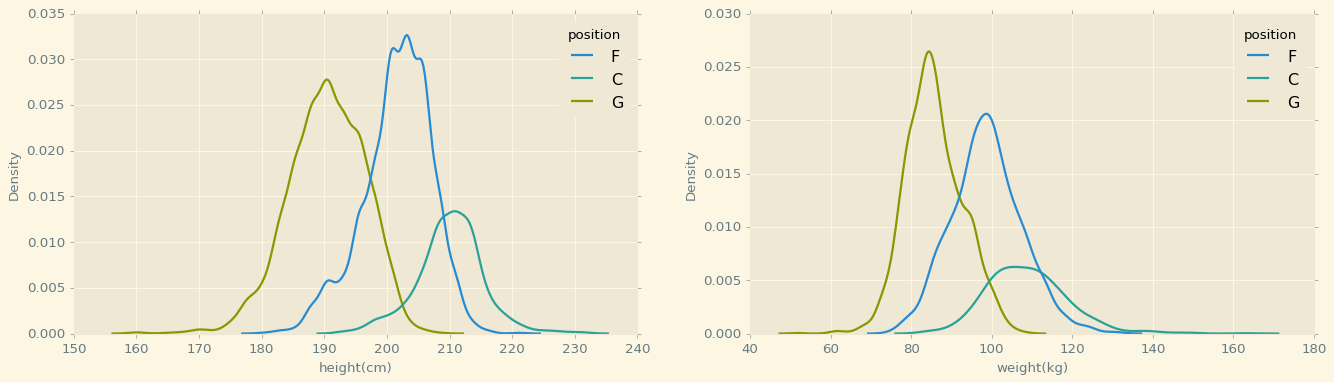

In [ ]:
#@title Plot by position to explain the bimodal of height and weight
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.kdeplot(data = players, x = 'height(cm)', hue = 'position')
plt.subplot(122)
sns.kdeplot(data = players, x = 'weight(kg)', hue = 'position')
plt.show()

- Height and weight: 4 out of 4 groups have similar distribution which are bimodal. (The first (lower) mode belongs to Guard players and the second (higher) mode belongs to Forward. 

  The number of Center players is smaller than the other groups. That's the reason why despite they have higher stats in height and weight, they only make the overall distribution a long tail to the right.

- NBA career length: no distinct difference in distribution.
- Year start's distribution of 4 elements look quite similar. There is a small increasing trend of each element in some periods (1950s: more Water players started their career, 1970s: more Earth players started their career, 1990s-2010s: more Air players started their career).  

##3.2 Skills and achievements in games

In [ ]:
# Inner join 2 tables
ps = pd.merge(players, ss8017, left_on = 'name', right_on = 'Player')
ps = ps.drop(columns=['Player'])

In [ ]:
#@title Define plotting functions
def box(df,title,xvar,yvar):
    plt.style.use(['classic','Solarize_Light2'])
    palette = {"Air": air_, "Fire": fire_, "Earth": earth_, "Water": water_}
    plt.title(title, y=1.02, pad = 3.5, fontsize=13, fontweight='bold', color=soil, fontfamily = 'gotham')
    sns.barplot(data = df, x = xvar, y = yvar, palette = palette, ci = None, linewidth = 0)

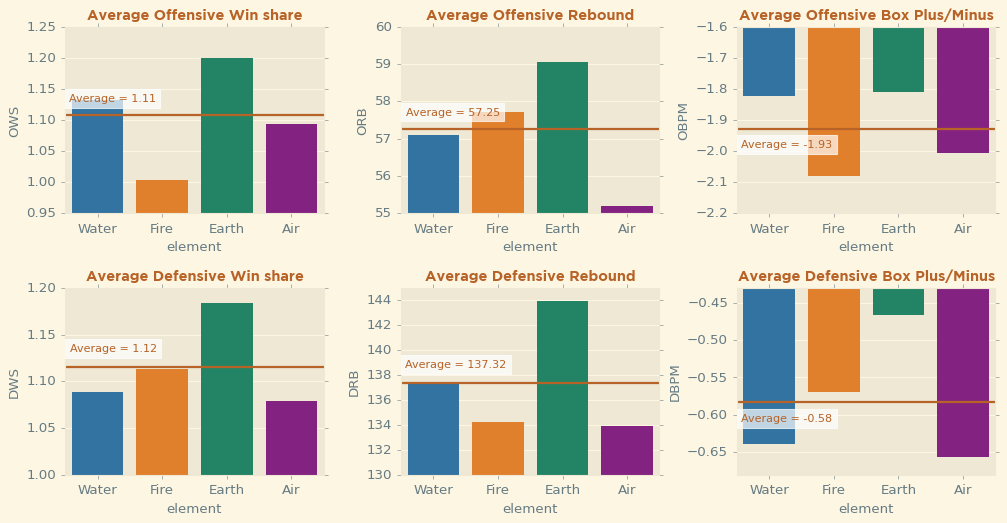

In [ ]:
#@title Offensive and defensive skills: average values
plt.figure(figsize=(15,7))
plt.subplots_adjust(wspace=0.3,hspace=0.4)

plt.subplot(2,3,1)
box(ps,"Average Offensive Win share", "element", "OWS")
plt.ylim([0.95, 1.25])
plt.axhline(y=ps['OWS'].mean(), color = soil)
a=round(ps['OWS'].mean(),2)
# plt.text('average')
t = plt.annotate(
    f'Average = {a}', xy=(0.23,1.13) , color=soil, fontsize='10', ha = 'center', 
    bbox=dict(fc=(.7, .7, .7), lw=0, pad=2))
t.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='white'))


plt.subplot(2,3,2)
box(ps,"Average Offensive Rebound", "element", "ORB")
plt.ylim([55, 60])
plt.axhline(y=ps['ORB'].mean(), color = soil)
b=round(ps['ORB'].mean(),2)
t = plt.annotate(
    f'Average = {b}', xy=(0.3,57.63) , color=soil, fontsize='10', ha = 'center', 
    bbox=dict(fc=(.7, .7, .7), lw=0, pad=2))
t.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='white'))


plt.subplot(2,3,3)
box(ps,"Average Offensive Box Plus/Minus", "element", "OBPM")
plt.ylim([-2.2, -1.6])
plt.axhline(y=ps['OBPM'].mean(), color = soil)
c=round(ps['OBPM'].mean(),2)
t = plt.annotate(
    f'Average = {c}', xy=(0.27,-1.99) , color=soil, fontsize='10', ha = 'center', 
    bbox=dict(fc=(.7, .7, .7), lw=0, pad=2))
t.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='white'))

plt.subplot(2,3,4)
box(ps,"Average Defensive Win share", "element", "DWS")
plt.ylim([1, 1.2])
plt.axhline(y=ps['DWS'].mean(), color = soil)
d=round(ps['DWS'].mean(),2)
t = plt.annotate(
    f'Average = {d}', xy=(0.24,1.132) , color=soil, fontsize='10', ha = 'center', 
    bbox=dict(fc=(.7, .7, .7), lw=0, pad=2))
t.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='white'))

plt.subplot(2,3,5)
box(ps,"Average Defensive Rebound", "element", "DRB")
plt.ylim([130, 145])
plt.axhline(y=ps['DRB'].mean(), color = soil)
e=round(ps['DRB'].mean(),2)
t = plt.annotate(
    f'Average = {e}', xy=(0.35,138.6) , color=soil, fontsize='10', ha = 'center', 
    bbox=dict(fc=(.7, .7, .7), lw=0, pad=2))
t.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='white'))

plt.subplot(2,3,6)
box(ps,"Average Defensive Box Plus/Minus", "element", "DBPM")
plt.ylim([-0.68, -0.43])
plt.axhline(y=ps['DBPM'].mean(), color = soil)
f=round(ps['DBPM'].mean(),2)
t = plt.annotate(
    f'Average = {f}', xy=(0.27,-0.609) , color=soil, fontsize='10', ha = 'center', 
    bbox=dict(fc=(.7, .7, .7), lw=0, pad=2))
t.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='white'))

plt.show()

- Comparing average value of offensive and defensive stats between elements, it is obvious that Earth players have higher-than-average stats in 6 out of 6 metrics.

In [ ]:
#@title Prepare data for GDS 
owsmean = ps.groupby('element')['OWS'].mean().reset_index()
orbmean = ps.groupby('element')['ORB'].mean().reset_index()
obpmmean = ps.groupby('element')['OBPM'].mean().reset_index()
dwsmean = ps.groupby('element')['DWS'].mean().reset_index()
drbmean = ps.groupby('element')['DRB'].mean().reset_index()
dbpmmean = ps.groupby('element')['DBPM'].mean().reset_index()
offensive1 = ps[['OBPM', 'OWS', 'ORB', 'element']].reset_index()
defensive1 = ps[['DBPM', 'DWS', 'DRB', 'element']].reset_index()

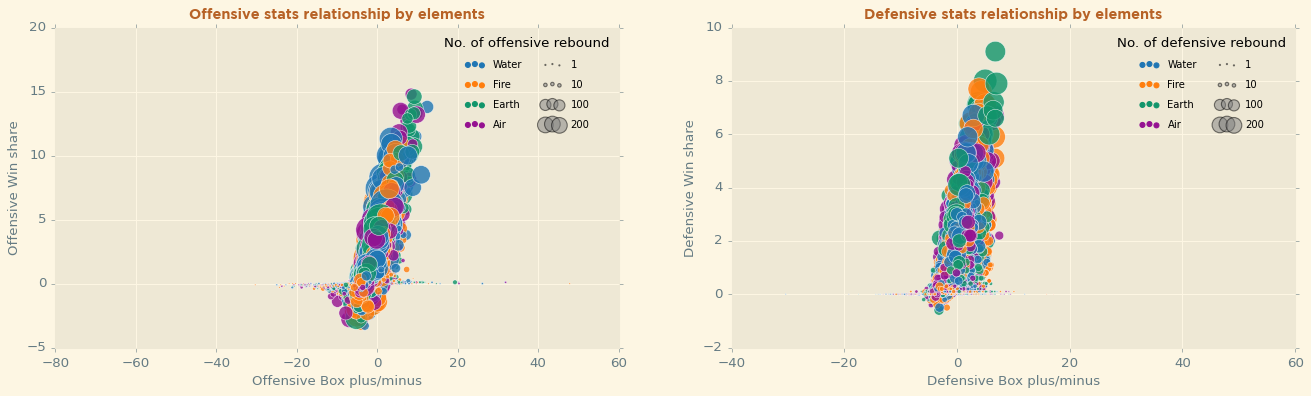

In [ ]:
#@title Offensive and defensive skills: relationships between variables
palette = {"Air": air_, "Fire": fire_, "Earth": earth_, "Water": water_}
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title("Offensive stats relationship by elements", y=1.02, pad = 2, fontsize=13, fontweight='bold', color=soil, fontfamily = 'gotham')
sns.scatterplot(data = ps, x = 'OBPM', y = 'OWS', hue = 'element', palette=palette, s = ps ['ORB']*2, alpha = 0.8, linewidth = 0.5)
plt.xlabel('Offensive Box plus/minus')
plt.ylabel('Offensive Win share')
size_range = [1, 10, 100, 200]
for size in size_range:
  plt.scatter([],[], s= size, label = str(size), c = 'grey', alpha = 0.5, )
plt.legend(labelspacing =1, title = 'No. of offensive rebound', frameon=False,ncol=2,fontsize=9)

plt.subplot(1,2,2)
plt.title("Defensive stats relationship by elements", y=1.02, pad = 2, fontsize=13, fontweight='bold', color=soil, fontfamily = 'gotham')
sns.scatterplot(data = ps, x = 'DBPM', y = 'DWS', hue = 'element', palette=palette, s = ps ['DRB']/2, alpha = 0.8, linewidth = 0.5)
size_range2 = [1, 10, 100, 200]
for size2 in size_range2:
  plt.scatter([],[], s= size2, label = str(size2), c = 'grey', alpha = 0.5, )
plt.legend(labelspacing =1, title = 'No. of defensive rebound', frameon=False,ncol=2,fontsize=9)
plt.xlabel('Defensive Box plus/minus')
plt.ylabel('Defensive Win share')
plt.show()

- Presenting correlation between Win share and Box plus/minus, there is a quite strong positive linear relationship.

- Earth once again appear in the top-tier of **both** offensive and defensive stats.

In [ ]:
#@title Prepare data for GDS 
aws = pd.pivot_table(data = ps, index = 'Age', columns = 'element', values = 'WS', aggfunc = 'mean').reset_index()
avorp = pd.pivot_table(data = ps, index = 'Age', columns = 'element', values = 'VORP', aggfunc = 'mean').reset_index()
aws = aws.melt(id_vars = 'Age', value_vars = ['Air', 'Earth', 'Fire','Water'], var_name = 'element', value_name = 'meanws')
avorp = avorp.melt(id_vars = 'Age', value_vars = ['Air', 'Earth', 'Fire','Water'], var_name = 'element', value_name = 'meanvorp')

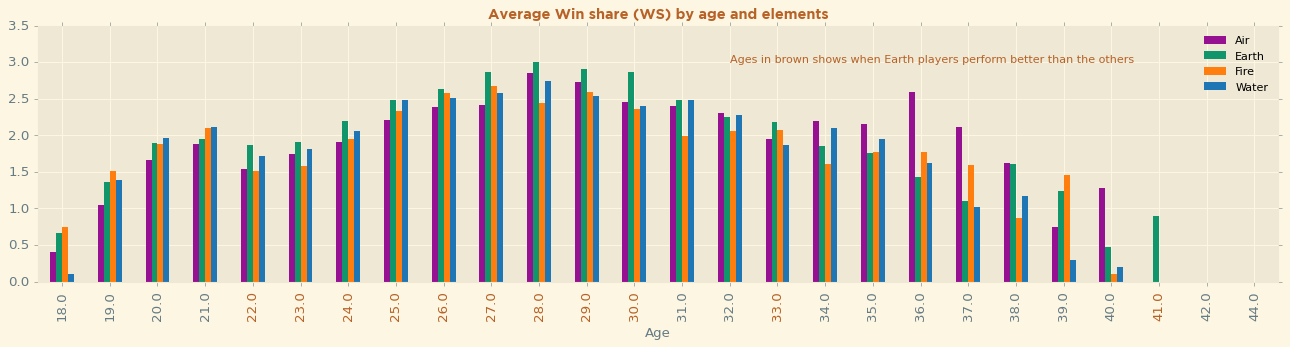

In [ ]:
#@title Efficiency in games by age
palette = {"Air": air_, "Fire": fire_, "Earth": earth_, "Water": water_}
ax1 = pd.pivot_table(data = ps, index = 'Age', columns = 'element', values = 'WS', aggfunc = 'mean').plot(kind='bar', figsize=(20,4), color = palette, linewidth=0)
plt.ylim(top=3.5)
ax1.get_xticklabels()[4].set_color(soil)
ax1.get_xticklabels()[5].set_color(soil)
ax1.get_xticklabels()[6].set_color(soil)
ax1.get_xticklabels()[7].set_color(soil)
ax1.get_xticklabels()[8].set_color(soil)
ax1.get_xticklabels()[9].set_color(soil)
ax1.get_xticklabels()[10].set_color(soil)
ax1.get_xticklabels()[11].set_color(soil)
ax1.get_xticklabels()[12].set_color(soil)
ax1.get_xticklabels()[15].set_color(soil)
ax1.get_xticklabels()[-3].set_color(soil)
plt.text(14,3, 'Ages in brown shows when Earth players perform better than the others', fontsize = 10 , color = soil)
plt.title("Average Win share (WS) by age and elements", y=1.02, pad = 2, fontsize=13, fontweight='bold', color=soil, fontfamily = 'gotham')
plt.legend(frameon=False, fontsize=10)
plt.show()

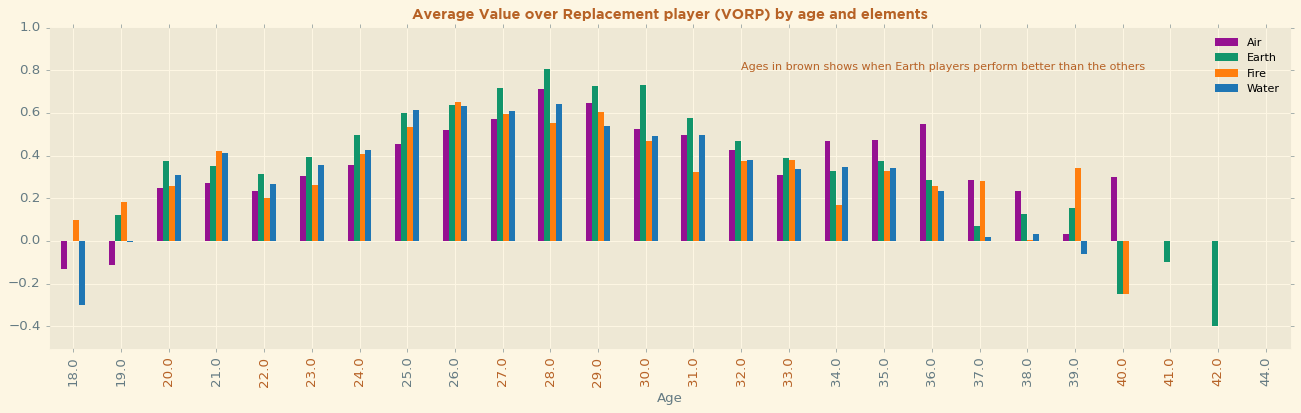

In [ ]:
#@title
palette = {"Air": air_, "Fire": fire_, "Earth": earth_, "Water": water_}
ax1 = pd.pivot_table(data = ps, index = 'Age', columns = 'element', values = 'VORP', aggfunc = 'mean').plot(kind='bar', figsize=(20,5), color = palette, linewidth=0)
plt.ylim(top=1.0, bottom = -0.5)
ax1.get_xticklabels()[2].set_color(soil)
ax1.get_xticklabels()[4].set_color(soil)
ax1.get_xticklabels()[5].set_color(soil)
ax1.get_xticklabels()[6].set_color(soil)
ax1.get_xticklabels()[9].set_color(soil)
ax1.get_xticklabels()[10].set_color(soil)
ax1.get_xticklabels()[11].set_color(soil)
ax1.get_xticklabels()[12].set_color(soil)
ax1.get_xticklabels()[13].set_color(soil)
ax1.get_xticklabels()[14].set_color(soil)
ax1.get_xticklabels()[15].set_color(soil)
ax1.get_xticklabels()[-2].set_color(soil)
ax1.get_xticklabels()[-3].set_color(soil)
ax1.get_xticklabels()[-4].set_color(soil)
plt.text(14,0.8, 'Ages in brown shows when Earth players perform better than the others', fontsize = 10 , color = soil)
plt.title("Average Value over Replacement player (VORP) by age and elements", y=1.02, pad = 2, fontsize=13, fontweight='bold', color=soil, fontfamily = 'gotham')
plt.legend(frameon=False, fontsize=10)
plt.show()

- When we take into account the metrics to show players' efficiency in games (how they contribute to team's win and how effectively they use their minutes on court) by their age, all elements have their own "peak" ages (in which they have the average Win share or Value over Replacement player higher than the rest).

- However, the overall "peak" belongs to Earth players and they also occupy most ( ~ 40%) prime ages, compared to the others.

## Results

|                  || 1 - Offense           | 2 - Defense                                 | | 3 - Efficiency           |
|------------------|------------------------------|---------------------------|-----------------------------------------|--------------------|----------------------|
| Best performer|                 | Earth | Earth          | |            Earth          |
|              |                      |

### 🤷‍♂️ Is it reasonable to wonder that despite having no dominant physical attributes, Earth players perform better that the rest because of their natutral potential?

#4. Earth players' highlights

In [ ]:
# Create a subset of earth players
earth = ps[ps['element'] == 'Earth']

In [ ]:
#@title Prepare data for GDS 
def earth_others(ps):
    if ps['element'] == 'Earth':
        return 'Earth'
    elif ps['element'] in ('Air', 'Water', 'Fire'):
        return 'Other elements'

ps['earth'] = ps.apply(earth_others, axis=1)

others = ps[ps['element'].isin(['Air', 'Water', 'Fire'])]

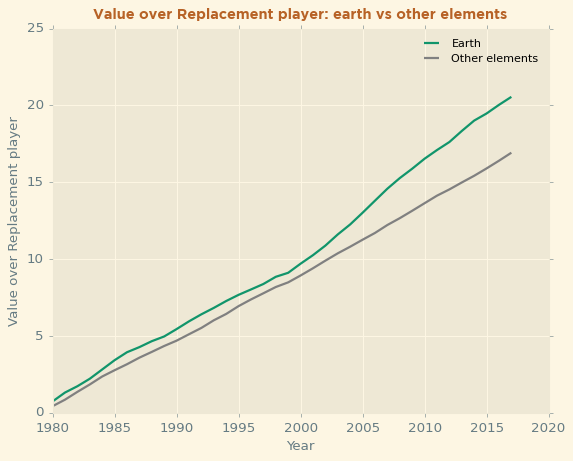

In [ ]:
#@title Value over Replacement player over the years: earth vs other elements
palette2 = {"Earth": earth_, "Other elements": 'grey'}
eovorp = pd.pivot_table(ps, index = 'Year', columns = 'earth', values = 'VORP', aggfunc = 'mean').cumsum().reset_index()
eovorpmelt= eovorp.melt(id_vars = 'Year', value_vars = ['Earth','Other elements'], var_name = 'Element type', value_name='VORP')
ax1=sns.lineplot(data=eovorpmelt, x="Year", y="VORP", hue = 'Element type', palette = palette2)
ax1.get_xaxis().get_major_formatter().set_useOffset(False)
plt.ylabel('Value over Replacement player')
plt.legend(frameon=False, fontsize=10)
plt.title("Value over Replacement player: earth vs other elements", y=1.02, pad = 2, fontsize=13, fontweight='bold', color=soil, fontfamily = 'gotham')
plt.show()

- Since 2000s, Earth' s average Value over Replacement player started to rise significantly than other elements'

- Also, there has been a clear increasing preference over Power Forward position among Earth players since 2000s.

In [ ]:
#@title Define plotting function 
def heat(title, df,color ):
  plt.style.use(['classic','Solarize_Light2'])
  plt.title(title, y=1.02, pad = 2, fontsize=15, fontweight='bold', color=soil, fontfamily = 'gotham')
  sns.heatmap(df, cmap=color)

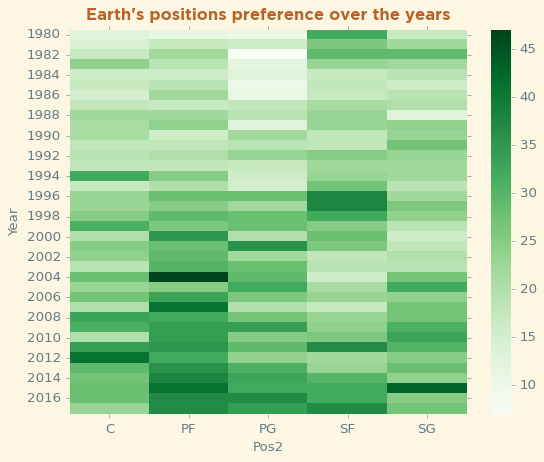

In [ ]:
#@title Earth's positions preference over the years
eforward = pd.pivot_table(earth, index = 'Year', columns= 'Pos2', values = 'name', aggfunc = "count")
heat("Earth's positions preference over the years", eforward, 'Greens')

### 🤷‍♂️ Is it reasonable to wonder that since 2000s, Earth players have been placed at their "right" position to make-the-most-of their natural potential?

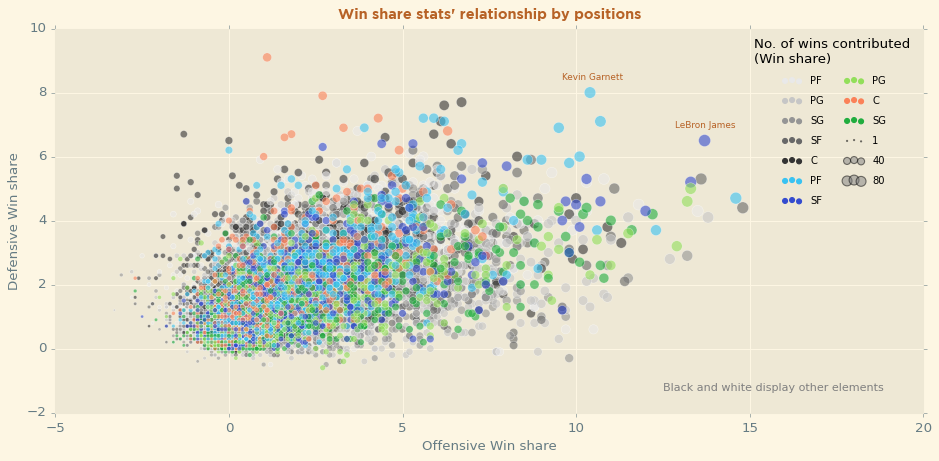

In [ ]:
#@title Earth by positions, what explains the trend?
plt.figure(figsize=(14,6))
plt.title("Win share stats' relationship by positions", y=1.02, pad = 2, fontsize=13, fontweight='bold', color=soil, fontfamily = 'gotham')
plt.text(12.5,-1.3, 'Black and white display other elements', fontsize = 10 , color = 'grey')
palette = {"PF": '#38C2F2', "SF": '#334BCF', "C": '#FB8158' , "PG": '#92DF5A', "SG": '#20AD3E'}

sns.scatterplot(data = others, x = 'OWS', y = 'DWS', hue = 'Pos2', palette = 'Greys', linewidth = 0.4, alpha=0.6, s=(others['WS']+3)*5)


plt.twinx

sns.scatterplot(data=earth, x = 'OWS', y = 'DWS', hue = 'Pos2', palette = palette, linewidth = 0.4, alpha=0.6, s = (earth['WS']+3)*5)
size_range2 = [1, 40, 80]
for size2 in size_range2:
  plt.scatter([],[], s= size2, label = str(size2), c = 'grey', alpha = 0.5, )
plt.legend(labelspacing =1, title = 'No. of wins contributed \n(Win share)', frameon=False,ncol=2,fontsize=9)
plt.xlabel('Offensive Win share')
plt.ylabel('Defensive Win share')
plt.annotate('Kevin Garnett', (9.6,	8.4),fontsize = 8, c = soil)
plt.annotate('LeBron James', (12.85,	6.9),fontsize = 8, c = soil)

plt.show()

- Power Forward (PF) earth players seem to have more balanced win share (offensive and defensive) than other positions, and higher than other elements of the same position.

# 🤷‍♂️  Some final thoughts

Overall
1. Even though Earth players show no prominent physical attribute in comparison to other elements, they perform better than the rest in terms of both offensive and defensive skills.


2. When it comes to efficiency (contribution to team's win), Earth are the stars throughout NBA players' prime ages.

Over the years

3. Earth players show noticeable progression in VORP since 2000s.


4. Among Earth players, there is an apparent preference towards Power Forward (PF) since 2000s. 



---



> According to the analysis, I see that there is NO SUCH THING as NATURAL BORN PLAYER. 

Everybody is gifted some features since born due to their parents' genes. Nevertheless, it makes no really considerable difference between us (e.g the height and weight distribution).

However, if zodiac sign elements come to into our conversation, I have a gut to say that this grouping reference actually do tell us some hints about people's in-born personality and how they could be fit in a position for these qualities.

NBA players born in Earth-element zodiac might reach their full potention when being trained and positioned in Power Forward.

In the same way, people born in some-element zodiac could also be their best version if they are put in a favourable environment to grow.



---





#5. Export to Google Sheet Report and Design a GDS Dashboard

In [ ]:
# Mount to Google Sheets 
from google.colab import auth
auth.authenticate_user()

# Import neccessary libraries
import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import set_with_dataframe

In [ ]:
# Authorize Google Sheets API
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
# Create a new Google Spreadsheets
# sh = gc.create('NBA_stats')

In [ ]:
def export_data_to_new_sheet(gsheet_key, worksheet_name, data):
    sh = gc.open_by_key(gsheet_key)
    
    # To create a new worksheet with 1000 rows and 26 columns
    worksheet = sh.add_worksheet(worksheet_name, 1000, 26)

    # For writing to an existing worksheet
    # worksheet = sh.get_worksheet(0) # --> to get the first worksheet

    set_with_dataframe(worksheet, data)

In [ ]:
#@title Export data to new sheet
# export_data_to_new_sheet('1RTkpse9vvLWxz4vT4vhf1UdrmVvrO-6GGCos_kaSj_A', 'ps', ps)
# export_data_to_new_sheet('1RTkpse9vvLWxz4vT4vhf1UdrmVvrO-6GGCos_kaSj_A', 'owsmean', owsmean)
# export_data_to_new_sheet('1RTkpse9vvLWxz4vT4vhf1UdrmVvrO-6GGCos_kaSj_A', 'orbmean', orbmean)
# export_data_to_new_sheet('1RTkpse9vvLWxz4vT4vhf1UdrmVvrO-6GGCos_kaSj_A', 'obpmmean', obpmmean)
# export_data_to_new_sheet('1RTkpse9vvLWxz4vT4vhf1UdrmVvrO-6GGCos_kaSj_A', 'dwsmean', dwsmean)
# export_data_to_new_sheet('1RTkpse9vvLWxz4vT4vhf1UdrmVvrO-6GGCos_kaSj_A', 'drbmean', drbmean)
# export_data_to_new_sheet('1RTkpse9vvLWxz4vT4vhf1UdrmVvrO-6GGCos_kaSj_A', 'dbpmmean', dbpmmean)
# export_data_to_new_sheet('1RTkpse9vvLWxz4vT4vhf1UdrmVvrO-6GGCos_kaSj_A', 'offensive1', offensive1)
# export_data_to_new_sheet('1RTkpse9vvLWxz4vT4vhf1UdrmVvrO-6GGCos_kaSj_A', 'defensive1', defensive1)
# export_data_to_new_sheet('1RTkpse9vvLWxz4vT4vhf1UdrmVvrO-6GGCos_kaSj_A', 'aws', aws)
# export_data_to_new_sheet('1RTkpse9vvLWxz4vT4vhf1UdrmVvrO-6GGCos_kaSj_A', 'avorp', avorp) 
# export_data_to_new_sheet('1RTkpse9vvLWxz4vT4vhf1UdrmVvrO-6GGCos_kaSj_A', 'eovorpmelt', eovorpmelt)
# export_data_to_new_sheet('1RTkpse9vvLWxz4vT4vhf1UdrmVvrO-6GGCos_kaSj_A', 'vorpe', vorpe)
# export_data_to_new_sheet('1RTkpse9vvLWxz4vT4vhf1UdrmVvrO-6GGCos_kaSj_A', 'earth', earth)
# export_data_to_new_sheet('1RTkpse9vvLWxz4vT4vhf1UdrmVvrO-6GGCos_kaSj_A', 'others', others)
# export_data_to_new_sheet('1RTkpse9vvLWxz4vT4vhf1UdrmVvrO-6GGCos_kaSj_A', 'hdf4', hdf4)